# **Assignment** DAY 7 - ELEVATE LABS

In [34]:
import pandas as pd
import numpy as np 
import seaborn as sns
import sqlite3

In [35]:
conn = sqlite3.connect('sales.db')


In [36]:
query = 'SELECT product, SUM(quantity) AS total_qty, SUM(quantity * price) AS revenue FROM sales GROUP BY product'

In [37]:
query

'SELECT product, SUM(quantity) AS total_qty, SUM(quantity * price) AS revenue FROM sales GROUP BY product'

In [38]:
query = "SELECT product, SUM(quantity) AS total_qty FROM sales GROUP BY product"

In [39]:
conn = sqlite3.connect('sales.db')
cursor = conn.cursor()


In [40]:
cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
product TEXT,
quantity INTEGER,
price FLOAT
)
''')

In [41]:
sample_data = [
('Product A', 10, 25.99),
('Product B', 5, 15.50),
('Product A', 8, 25.99),
('Product C', 12, 10.99)
]
cursor.executemany('INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)', sample_data)

In [42]:
conn.commit()


In [43]:
query = 'SELECT product, SUM(quantity) AS total_qty, SUM(quantity * price) AS revenue FROM sales GROUP BY product'

In [44]:
df = pd.read_sql_query(query, conn)


In [45]:
print(df)

     product  total_qty  revenue
0  Product A         36   935.64
1  Product B         10   155.00
2  Product C         24   263.76


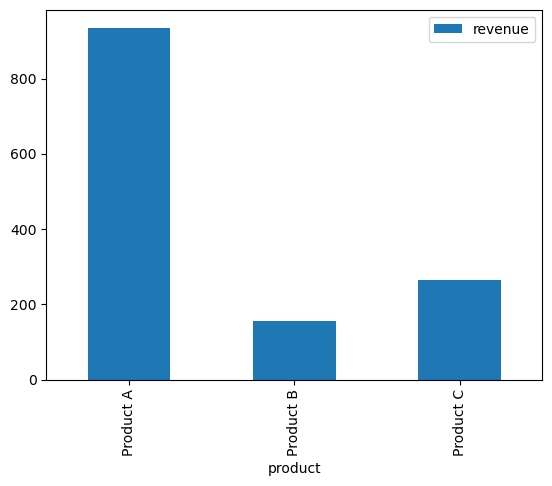

In [46]:
import matplotlib.pyplot as plt
df.plot(kind='bar'
, x='product'
, y='revenue')

plt.savefig("sales_chart.png")